In [1]:
import mne
#%gui qt
#import matplotlib

#%matplotlib qt
import numpy as np
from matplotlib import pyplot as plt
from stormdb.access import Query
from pickle import load
from scipy import stats
from mne.datasets import sample
from mne.stats import spatio_temporal_cluster_1samp_test
import os
import pickle
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# os.environ['ETS_TOOLKIT'] = 'qt4'
# os.environ['QT_API'] = 'pyqt5'
# %gui qt
#mne.viz.set_3d_backend("notebook")

In [2]:
proj_name = 'MINDLAB2020_MEG-AuditoryPatternRecognition'
wdir = '/projects/' + proj_name + '/scratch/working_memory/'
stats_dir = wdir + 'results/stats/'
data_dir = wdir + 'averages/data/'

In [3]:
# Read stats
sfname = '{}ERF_sensor_stats.p'.format(stats_dir)
sfile = open(sfname,'rb')
stats_results = pickle.load(sfile)
sfile.close()

In [6]:
# Load an ERF
dfname = data_dir + '0021_LZW_evoked.p'
dfile = open(dfname,'rb')
ERF_dict = pickle.load(dfile)
ERF = ERF_dict['maint']


############### mag ################

############# encoding ################

maintenance


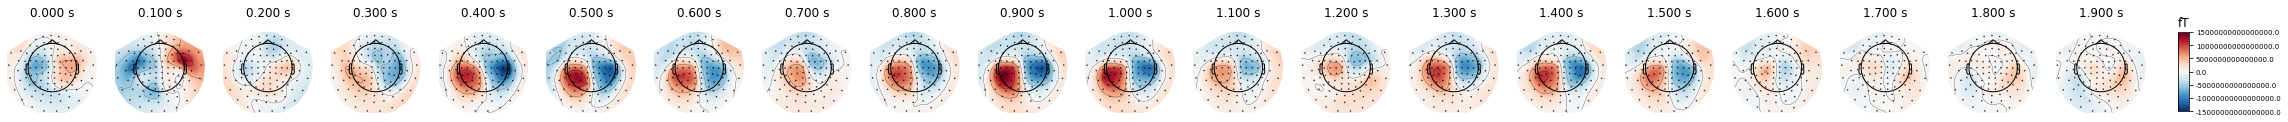

manipulation


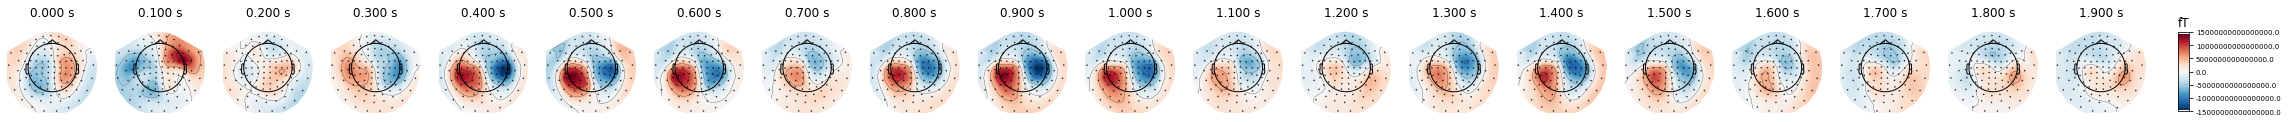

difference


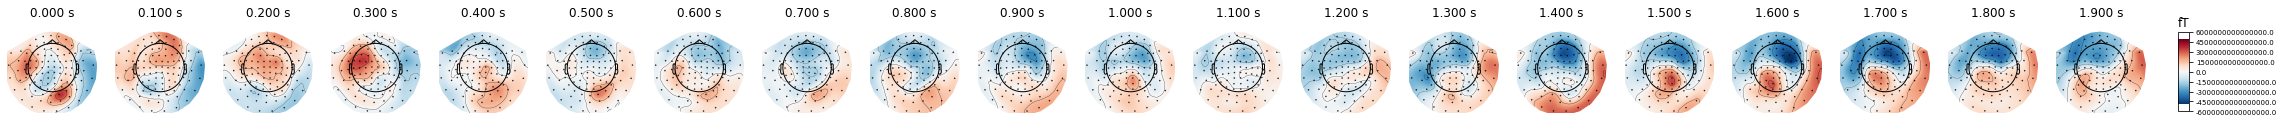

############# delay ################

maintenance


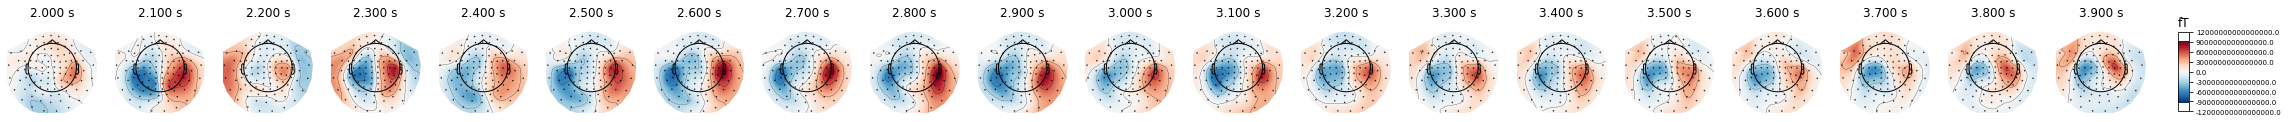

manipulation


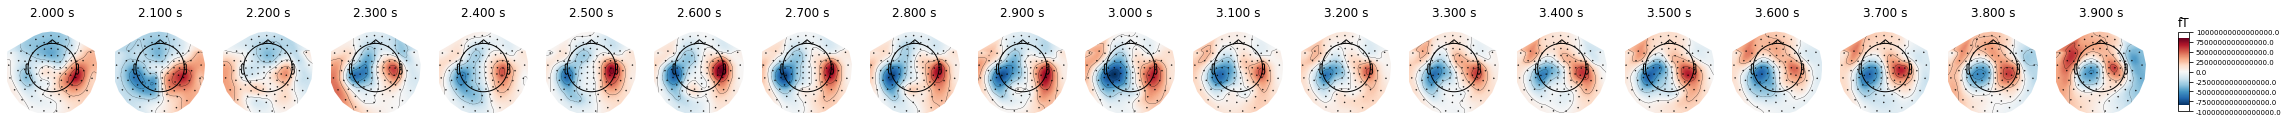

difference


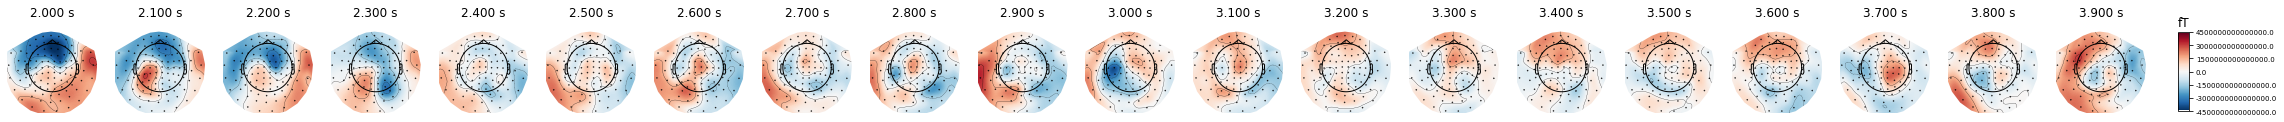

############# retrieval ################

maintenance


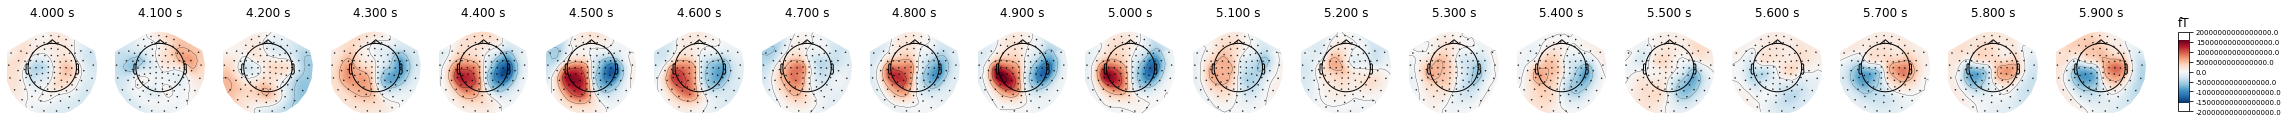

manipulation


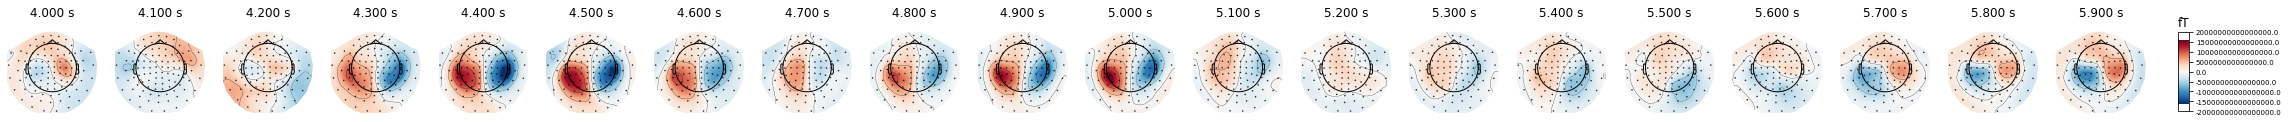

difference


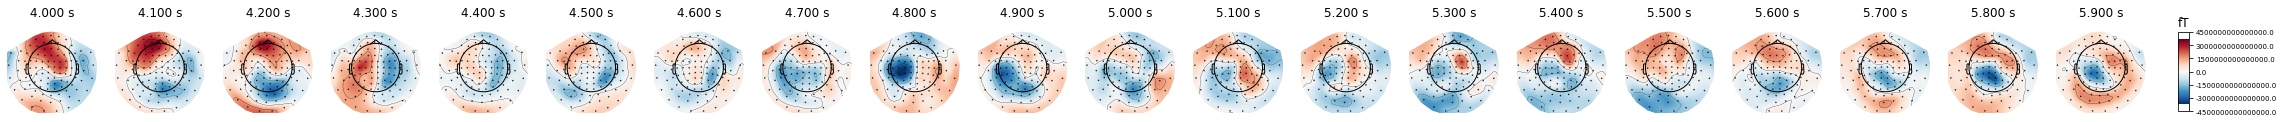


############### grad ################

############# encoding ################

maintenance


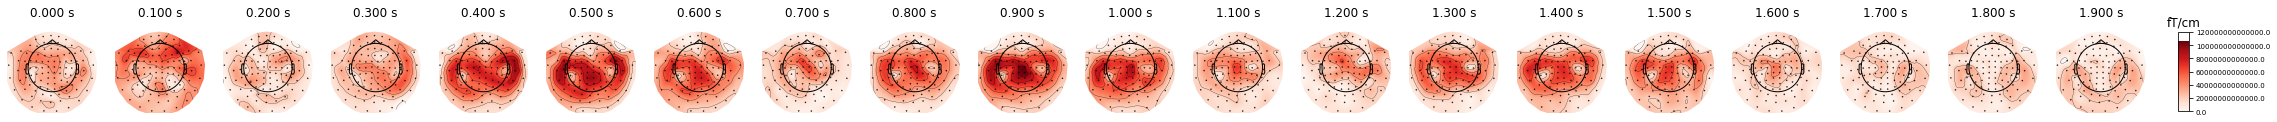

manipulation


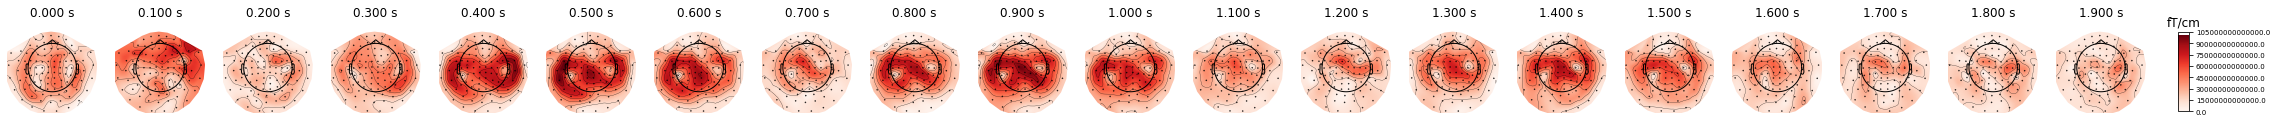

difference


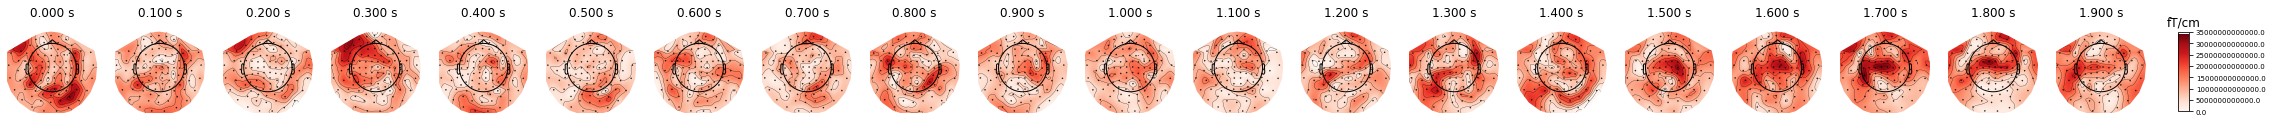

############# delay ################

maintenance


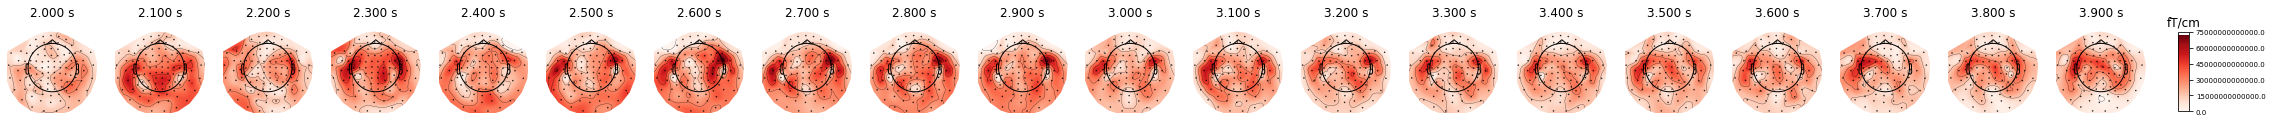

manipulation


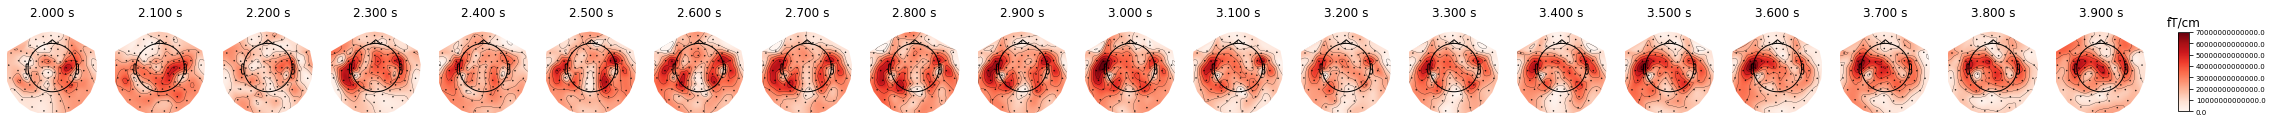

difference


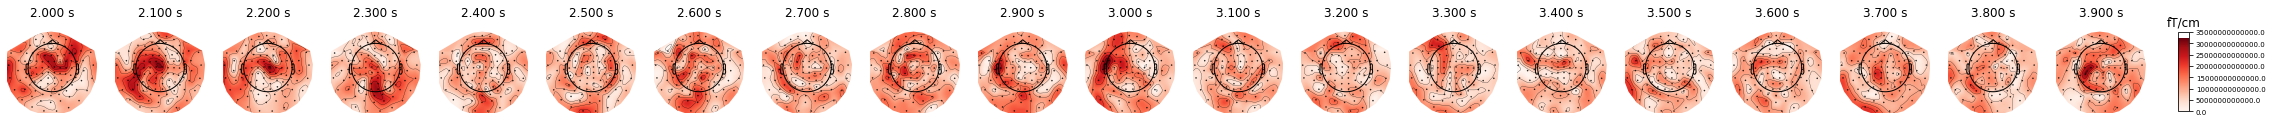

############# retrieval ################

maintenance


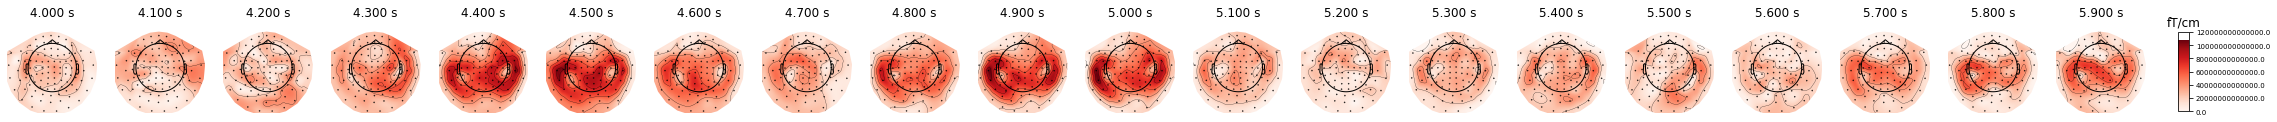

manipulation


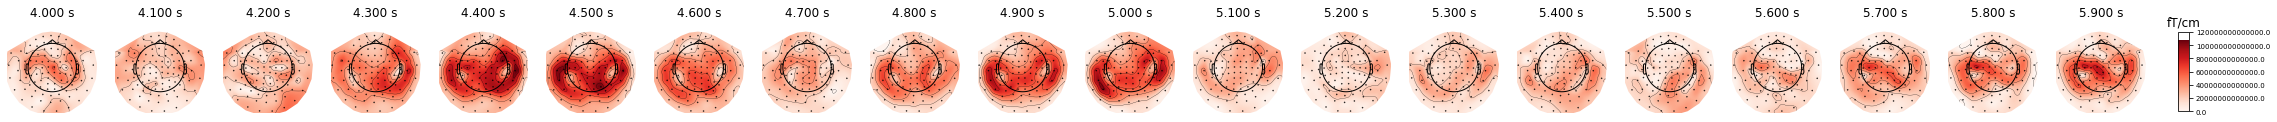

difference


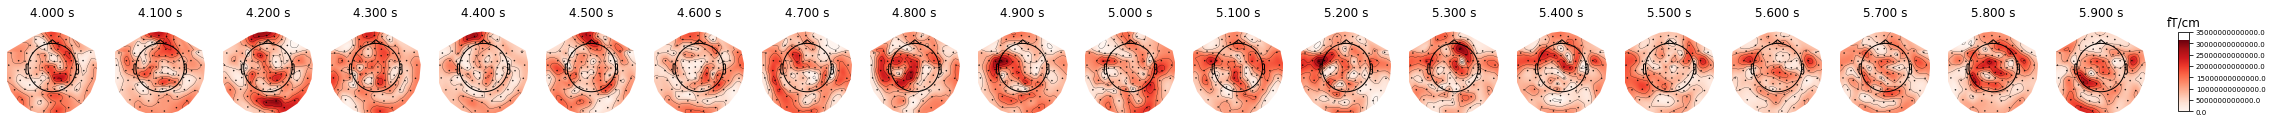

In [6]:
# Plot all topomaps
periods = {'encoding': [0,2], 'delay': [2,4], 'retrieval': [4,6]}
ch_type = ['mag','grad']
for cht in ch_type:
    print('\n############### {} ################\n'.format(cht))
    for p in periods:
        print('############# {} ################\n'.format(p))
        for c in stats_results:
            tmin = periods[p][0]
            tmax = periods[p][1]
            cERF = ERF.copy().pick_types(meg=cht).crop(tmin=tmin, tmax=tmax)
            tidx = np.where([x and y for x,y in zip(ERF.times >= tmin, ERF.times <= tmax)])[0]
            chidx = np.array(mne.pick_types(ERF.info, meg = cht))

            cpvals = stats_results[c]['pvals'].copy()
            cpvals = cpvals[tidx, :]
            cpvals = cpvals[:,chidx].T

            cdata = stats_results[c]['tvals'].copy()
            cdata = cdata[chidx,:]
            cdata = cdata[:,tidx]

            gmask, adj_pvals = mne.stats.fdr_correction(cpvals, 0.025)
            cERF.data = cdata#*gmask #stats_results[c]['mask']
            plot_times = np.arange(0,2,0.1) + tmin
            
            print(c)
            cERF.plot_topomap(times=plot_times)


############### mag ################

############# encoding ################

maintenance


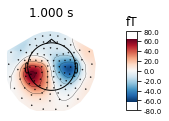

manipulation


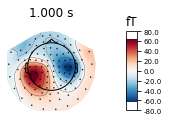

difference


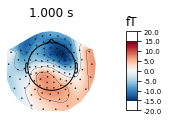

############# delay ################

maintenance


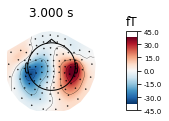

manipulation


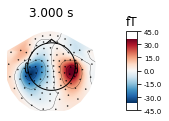

difference


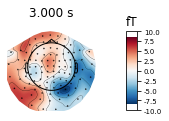

############# retrieval ################

maintenance


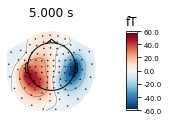

manipulation


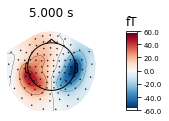

difference


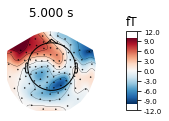


############### grad ################

############# encoding ################

maintenance


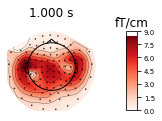

manipulation


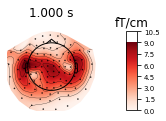

difference


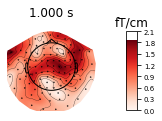

############# delay ################

maintenance


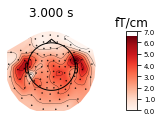

manipulation


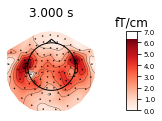

difference


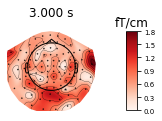

############# retrieval ################

maintenance


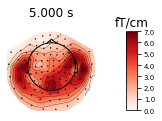

manipulation


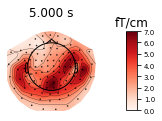

difference


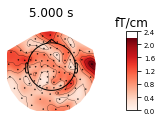

In [7]:
#Plot mean topomaps
# Plot all topomaps
periods = {'encoding': [0,2], 'delay': [2,4], 'retrieval': [4,6]}
ch_type = ['mag','grad']
for cht in ch_type:
    print('\n############### {} ################\n'.format(cht))
    for p in periods:
        print('############# {} ################\n'.format(p))
        for c in stats_results:
            tmin = periods[p][0]
            tmax = periods[p][1]
            cERF = ERF.copy().pick_types(meg=cht).crop(tmin=tmin, tmax=tmax)
            tidx = np.where([x and y for x,y in zip(ERF.times >= tmin, ERF.times <= tmax)])[0]
            chidx = np.array(mne.pick_types(ERF.info, meg = cht))

            cpvals = stats_results[c]['pvals'].copy()
            cpvals = cpvals[tidx, :]
            cpvals = cpvals[:,chidx].T

            cdata = stats_results[c]['data_mean'].copy()
            cdata = cdata[chidx,:]
            cdata = cdata[:,tidx]

            gmask, adj_pvals = mne.stats.fdr_correction(cpvals, 0.025)
            cERF.data = cdata#*gmask #stats_results[c]['mask']
            plot_times = np.arange(0,2,0.1) + tmin
            
            print(c)
            cERF.plot_topomap(times= (tmin+tmax)/2, average = 2)

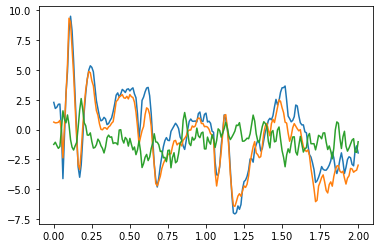

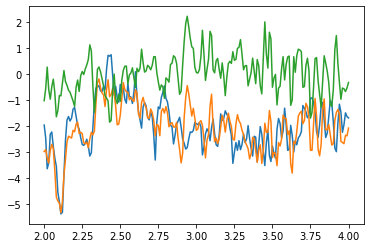

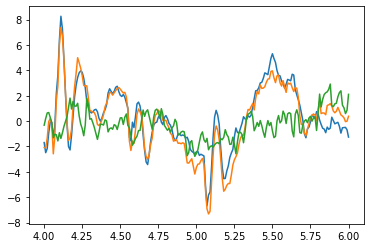

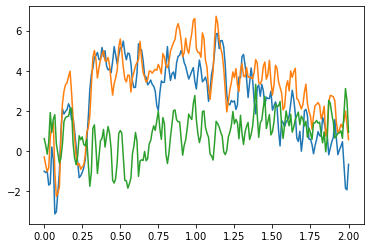

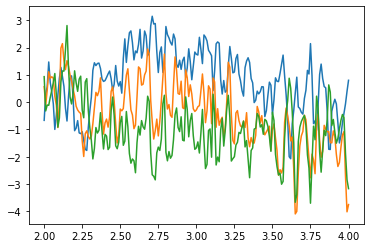

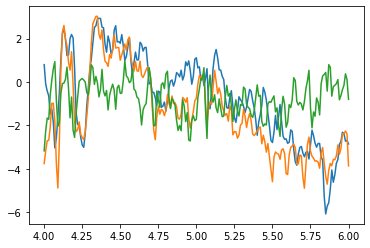

In [8]:
# Plot channel pairs
periods = {'encoding': [0,2], 'delay': [2,4], 'retrieval': [4,6]}
channels = ['MEG1332','MEG2242']
for cht in channels:
    for p in periods:
        fig = plt.figure()
        for c in stats_results:
            tmin = periods[p][0]
            tmax = periods[p][1]
            cERF = ERF.copy().pick_channels([cht]).crop(tmin=tmin, tmax=tmax)
            tidx = np.where([x and y for x,y in zip(ERF.times >= tmin, ERF.times <= tmax)])[0]
            chidx = np.array(mne.pick_channels(ERF.info['ch_names'], [cht]))

            cpvals = stats_results[c]['pvals'].copy()
            cpvals = cpvals[tidx, :]
            cpvals = cpvals[:,chidx].T

            cdata = stats_results[c]['tvals'].copy()
            cdata = cdata[chidx,:]
            cdata = cdata[:,tidx]

            gmask, adj_pvals = mne.stats.fdr_correction(cpvals, 0.025)
            cERF.data = cdata#*gmask #stats_results[c]['mask']
            plt.plot(ERF.times[tidx],np.squeeze(cERF.data))

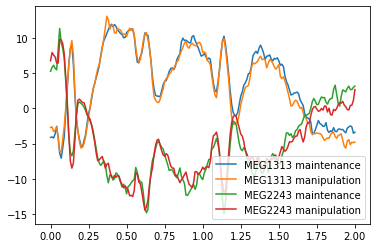

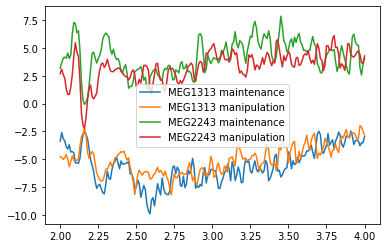

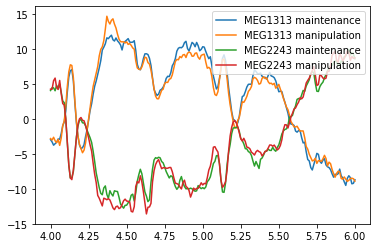

In [9]:
# Plot channel pairs
periods = {'encoding': [0,2], 'delay': [2,4], 'retrieval': [4,6]}
channels = ['MEG1313','MEG2243']
lgd_labs = []
for p in periods:
    fig = plt.figure()
    for cht in channels:
        for c in stats_results:
            if c != 'difference':
                lgd_labs.append(cht + ' ' + c)
                tmin = periods[p][0]
                tmax = periods[p][1]
                cERF = ERF.copy().pick_channels([cht]).crop(tmin=tmin, tmax=tmax)
                tidx = np.where([x and y for x,y in zip(ERF.times >= tmin, ERF.times <= tmax)])[0]
                chidx = np.array(mne.pick_channels(ERF.info['ch_names'], [cht]))

                cpvals = stats_results[c]['pvals'].copy()
                cpvals = cpvals[tidx, :]
                cpvals = cpvals[:,chidx].T

                cdata = stats_results[c]['tvals'].copy()
                cdata = cdata[chidx,:]
                cdata = cdata[:,tidx]

                gmask, adj_pvals = mne.stats.fdr_correction(cpvals, 0.025)
                cERF.data = cdata#*gmask #stats_results[c]['mask']
                plt.plot(ERF.times[tidx],np.squeeze(cERF.data))
    plt.legend(lgd_labs)

In [10]:
# Read stats
tfname = '{}ERF_target_sensor_stats.p'.format(stats_dir)
tfile = open(tfname,'rb')
target_results = pickle.load(tfile)
tfile.close()

In [7]:
# Plot all target topomaps
ch_type = ['mag','grad']
for cht in ch_type:
    print('\n############### {} ################\n'.format(cht))
    for c in target_results:
        print('\n############### {} ################\n'.format(c))
        for p in target_results[c]:
            cERF = ERF.copy().pick_types(meg=cht).crop(tmin=4, tmax=6)        
            chidx = np.array(mne.pick_types(ERF.info, meg = cht))

            cpvals = target_results[c][p]['pvals'].copy()
            cpvals = cpvals[:,chidx].T

            cdata = target_results[c][p]['tvals'].copy()
            cdata = cdata[chidx,:]

            gmask, adj_pvals = mne.stats.fdr_correction(cpvals, 0.025)
            cERF.data = cdata*gmask #stats_results[c]['mask']
            plot_times = np.arange(4,6,0.1)

            print(p)
            cERF.plot_topomap(times=plot_times)


############### mag ################



NameError: name 'target_results' is not defined

In [3]:
# Read stats
mfname = '{}ERF_mels_sensor_stats.p'.format(stats_dir)
mfile = open(mfname,'rb')
mel_results = pickle.load(mfile)
mfile.close()

In [4]:
mel_results

{'mag': {'maint/mel1-mel2': {'mask': array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]),
   'tvals': array([[-1.03703852, -0.68096752, -0.24766032, ..., -1.86251608,
           -1.66790758, -1.78875753],
          [-1.36550222, -1.24711408, -1.12792726, ..., -0.47988677,
           -0.32676175, -0.83927247],
          [-1.19552555, -1.23176345, -1.25158336, ..., -0.77519966,
           -0.44798003, -0.26958852],
          ...,
          [-1.30683772, -1.02050641, -1.28723622, ...,  0.36424377,
           -0.53233545, -1.25564824],
          [-1.40764234, -1.00327176, -1.45803804, ...,  0.49739383,
           -0.34798187, -1.4379252 ],
          [-0.75149168, -0.51071586, -1.383906  , ...,  0.75838746,
           -0.58035955, -1.50047771]]),
   'pvals': array([1.000e+00, 1.000e+00, 

In [8]:
# Plot all topomaps
periods = {'encoding': [0,2], 'delay': [2,4], 'retrieval': [4,6]}
ch_type = ['mag','grad']
for cht in ch_type:
    print('\n############### {} ################\n'.format(cht))
    for c in mel_results[cht]:
        cERF = ERF.copy().pick_types(meg=cht).crop(tmin=0, tmax=4)
        chidx = np.array(mne.pick_types(ERF.info, meg = cht))

        cpvals = mel_results[cht][c]['pvals'].copy()
        #cpvals = cpvals.T

        cdata = mel_results[cht][c]['tvals'].copy()

        #gmask, adj_pvals = mne.stats.fdr_correction(cpvals, 0.025)
        gmask = mel_results[cht][c]['mask'].copy()
        cERF.data = cdata*gmask #stats_results[c]['mask']
        plot_times = np.arange(0,4,0.1)

        print(c)
        cERF.plot_topomap(times=plot_times)


############### mag ################



KeyError: 'mag'